In [1]:
import re

import matplotlib.pyplot as plt
import numpy
import pandas
import pandas as pd
import seaborn
from tqdm.auto import tqdm
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
train01_csv = pandas.read_csv("data/train01.csv", sep=";", index_col="id")
train02_csv = pandas.read_csv("data/train02.csv", sep=";", index_col="id")
test = pandas.read_csv("data/test.csv", sep=";", index_col="id")

train01_csv.shape, train02_csv.shape, test.shape

((91946, 43), (93189, 43), (23386, 42))

In [3]:
train01_csv.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42
id,,,,,,,,,,,,,,,,,,,,,
-9196902500682081904,0,-2201458060675810556,01.09.2008,6312572492787112517,182,-6.347413e+18,2066976859146697559,0,[4770.1499999999996 885.49000000000001 1956.36...,[4770.1499999999996 885.49000000000001 1956.36...,...,"[nan, nan, nan, nan, nan, nan]","[3.0, 2.0, 1.0, nan, nan, 1.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[224.79, 224.79, 224.79, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
-9196902500682081900,0,-2201458060675810556,05.02.2013,4293238556669161936,182,-8.465179e+18,-8648529837587014226,0,[328.93000000000001 3.9700000000000002 996.149...,[328.93000000000001 3.9700000000000002 996.149...,...,"[nan, nan, nan, nan, nan, nan]","[4.0, nan, nan, 2.0, 3.0, 7.0]","[90.27, 90.27, 90.27, 90.27, 90.27, 90.27]","[249.94, 249.94, 249.94, 249.94, 155.64, 155.64]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[103.09, 103.09, 103.09, 103.09, 103.09, 103.09]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
-9196902500682081899,0,-2201458060675810556,01.09.2008,6312572492787112517,175,5.417474e+18,-5480331477604673780,1,[0.28000000000000003 0.39000000000000001 387.1...,[0.28000000000000003 0.39000000000000001 387.1...,...,"[nan, nan, nan, nan, nan, nan]","[1.0, nan, nan, nan, nan, 2.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[196.61, 224.79, 197.55, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
-9196902500682081897,0,-2201458060675810556,01.09.2008,6312572492787112517,182,-6.347413e+18,-3150357754345161454,0,[146.28999999999999 688.25999999999999 1025.88...,[146.28999999999999 688.25999999999999 1025.88...,...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, 1.0, 2.0, 1.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[199.65, 199.65, 199.65, 199.65, 199.65, 199.65]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
-9196902500681081897,0,-2201458060675810556,01.09.2008,6312572492787112517,179,6.856367e+18,4900304581511328621,2,[nan nan nan nan nan nan nan nan nan nan nan n...,[nan nan nan nan nan nan nan nan nan nan nan n...,...,"[nan, nan, nan, nan, nan, nan]","[3.0, nan, 2.0, nan, 1.0, 5.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[224.79, 224.79, 224.79, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"


In [4]:
train01_csv["x2"].dropna(inplace=False).apply(lambda x: int(x[6:])).sort_values(ascending=False)

id
 6037638172626199924    3201
-2750324427707531294    2017
 918449070515617502     2017
-1305300141475143987    2017
 318255697601633547     2017
                        ... 
 4461918972861738769    2002
 4461922972874738777    2001
 4461922972879738764    2001
 1461890972707738553    2001
 4461907972737738541    2001
Name: x2, Length: 91908, dtype: int64

In [5]:
test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42
id,,,,,,,,,,,,,,,,,,,,,
-9196902500682081904,-2201458060675810556,2008-09-01 00:00:00,6312572492787112517,183,-6.347413e+18,2066976859146697559,0,[431.63 188.56999999999999 430.73000000000002 ...,[431.63 188.56999999999999 430.73000000000002 ...,"[nan, nan, nan, nan, nan, nan]",...,"[nan, nan, nan, nan, nan, nan]","[1.0, nan, nan, 1.0, nan, 6.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[224.79, 224.79, 224.79, 224.79, 224.79, 224.79]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
-9196902500681081889,-2201458060675810556,2008-09-01 00:00:00,6312572492787112517,183,3.052557e+18,-8367157107954005236,0,[287.63 8051.1199999999999 5301.6700000000001 ...,[287.63 8051.1199999999999 5301.6700000000001 ...,"[nan, nan, nan, nan, nan, nan]",...,"[nan, 0.0, nan, nan, nan, nan]","[nan, nan, nan, 2.0, 1.0, nan]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[199.65, 199.65, 199.65, 199.65, 199.65, 199.65]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
-9196902500679081891,-2201458060675810556,2011-03-01 00:00:00,6312572492787112517,137,-8.465179e+18,2066976859146697559,2,[45.520000000000003 728.21000000000004 2548.57...,[45.520000000000003 728.21000000000004 2548.57...,"[nan, nan, nan, nan, nan, nan]",...,"[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, 4.0, nan]","[75.18, 67.64, 75.18, 75.18, 75.18, 75.18]","[195.46, 61.35, 195.46, 222.28, 222.28, 222.28]","[107.87, 107.87, 107.87, 107.87, 107.87, 107.87]","[77.19, 77.19, 77.19, 77.19, 77.19, 77.19]","[88.01, 80.46, 88.01, 88.01, 88.01, 88.01]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
-9196902500679081889,-2201458060675810556,2008-09-01 00:00:00,6312572492787112517,183,3.052557e+18,-8367157107954005236,0,[0.01 0.01 0.0 0.01 0.01 0.01 0.0 0.01 0.01 0....,[0.01 0.01 0.0 0.01 0.01 0.01 0.0 0.01 0.01 0....,"[nan, nan, nan, nan, nan, nan]",...,"[nan, nan, nan, nan, nan, nan]","[1.0, 1.0, nan, nan, 2.0, 1.0]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[199.65, 177.34, 199.65, 199.65, 199.65, 199.65]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"
-9196902500677081902,-2201458060675810556,2008-09-01 00:00:00,6312572492787112517,183,-8.465179e+18,-4936635693953926999,0,[9.0600000000000005 88.730000000000004 33.8100...,[9.0600000000000005 88.730000000000004 33.8100...,"[nan, nan, nan, nan, nan, nan]",...,"[nan, nan, nan, nan, nan, nan]","[2.0, nan, nan, 1.0, nan, nan]","[67.64, 67.64, 67.64, 67.64, 67.64, 67.64]","[199.65, 199.65, 199.65, 199.65, 199.65, 199.65]","[nan, nan, nan, nan, nan, nan]","[77.19, 77.19, 77.19, 77.19, 77.19, 77.19]","[80.46, 80.46, 80.46, 80.46, 80.46, 80.46]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan, nan]"


Будем использовать `train01` как тренировочные данные, а `train02` как валидационные. Но для этого необходимо удалить пользователей из `train02`, которые были в `train01`.

In [6]:
val_mask = ~train02_csv.index.isin(train01_csv.index)
val = train02_csv[val_mask]

train01_csv.shape, val.shape

((91946, 43), (28021, 43))

0.025177821764948993 0.04211127368759145


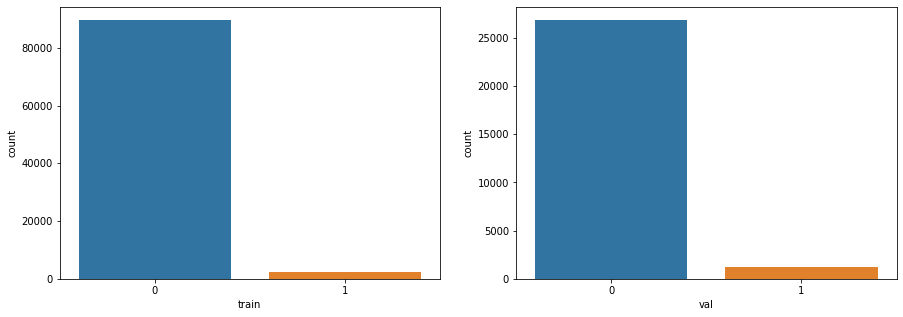

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
seaborn.countplot(x="y", data=train01_csv, ax=axs[0])
axs[0].set_xlabel("train")
seaborn.countplot(x="y", data=val, ax=axs[1])
axs[1].set_xlabel("val")

print(train01_csv["y"].sum() / len(train01_csv), val["y"].sum() / len(val))

# Features go brrrr

In [8]:
def date_features(data, is_test, inplace=True):
    if not inplace:
        data = data.copy()
    # Remove with nan data
    data.dropna(subset=["x2"], inplace=True)
    # Remove outlier with too big year (3201 in train 1)
    if 6037638172626199924 in data.index:
        data.drop([6037638172626199924], inplace=True)
    date_format = "%Y-%m-%d %H:%M:%S" if is_test else "%d.%m.%Y"
    data["x2"] = pandas.to_datetime(data["x2"], format=date_format)
    data["season"] = data["x2"].apply(lambda x: (x.month % 12) / 3)
    data["milliseconds"] = data["x2"].apply(lambda x: x.timestamp())
    data.drop("x2", axis=1, inplace=True)
    return data

def generate_categorical(data, features, const=-10000, inplace=True):
    if not inplace:
        data = data.copy()
    for feature in tqdm(features):
        nan_mask = data[feature].isna()
        data[f"{feature}_isna"] = nan_mask.astype(numpy.int8)
        data.loc[nan_mask, feature] = const
        data[feature] = data[feature].apply(str)
    return data

clean_reg = re.compile("[\[\],\\n]")
def time_series_features(data, features, inplace=True):
    if not inplace:
        data = data.copy()
    for feature in tqdm(features):
        values = numpy.vstack(data[feature].apply(
            lambda x: numpy.array([float(it) for it in re.sub(clean_reg, "", x).split()])
        ))
        nan_mask = numpy.isnan(values)
        all_nan = nan_mask.sum(-1) == nan_mask.shape[1]
        masked_values = numpy.ma.array(values, mask=nan_mask)
        
        data[f"{feature}_nan_cnt"] = nan_mask.sum(-1)
        
        data[f"{feature}_sum"] = masked_values.sum(-1).data
        data.loc[all_nan, f"{feature}_sum"] = 0
        data[f"{feature}_min"] = masked_values.min(-1).data
        data.loc[all_nan, f"{feature}_min"] = 0
        data[f"{feature}_max"] = masked_values.max(-1).data
        data.loc[all_nan, f"{feature}_max"] = 0
        data[f"{feature}_mean"] = masked_values.mean(-1).data
        data.loc[all_nan, f"{feature}_mean"] = 0
        
        data.drop(feature, axis=1, inplace=True)
        
    return data

def generate_features(data, is_test=False):
    features = date_features(data, inplace=False, is_test=is_test)
    generate_categorical(features, features=["x1", "x3", "x4", "x5", "x6", "x7"], inplace=True)
    time_series_features(features, [f"x{it}" for it in range(8, 43)], inplace=True)
    return features

In [9]:
train_feat = generate_features(train01_csv)
train_X, train_y = train_feat.drop("y", axis=1), train_feat["y"]
train_X.head()

,x1,x3,x4,x5,x6,x7,season,milliseconds,x1_isna,x3_isna,...,x41_nan_cnt,x41_sum,x41_min,x41_max,x41_mean,x42_nan_cnt,x42_sum,x42_min,x42_max,x42_mean
id,,,,,,,,,,,,,,,,,,,,,
-9196902500682081904,-2201458060675810556,6312572492787112517,182,-6.34741324639e+18,2066976859146697559,0,3.000000,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500682081900,-2201458060675810556,4293238556669161936,182,-8.46517904918e+18,-8648529837587014226,0,0.666667,1.360022e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500682081899,-2201458060675810556,6312572492787112517,175,5.41747352267e+18,-5480331477604673780,1,3.000000,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500682081897,-2201458060675810556,6312572492787112517,182,-6.34741324639e+18,-3150357754345161454,0,3.000000,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500681081897,-2201458060675810556,6312572492787112517,179,6.85636664402e+18,4900304581511328621,2,3.000000,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0


In [10]:
val_feat = generate_features(val)
val_X, val_y = val_feat.drop("y", axis=1), val_feat["y"]
val_X.head()

,x1,x3,x4,x5,x6,x7,season,milliseconds,x1_isna,x3_isna,...,x41_nan_cnt,x41_sum,x41_min,x41_max,x41_mean,x42_nan_cnt,x42_sum,x42_min,x42_max,x42_mean
id,,,,,,,,,,,,,,,,,,,,,
-9196902500682081892,-2201458060675810556,6312572492787112517,184,-6.34741324639e+18,-7360658494542411652,0,3.000000,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500681081898,-2201458060675810556,6312572492787112517,58,-8.46517904918e+18,-8648529837587014226,4,3.000000,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500680081901,-2201458060675810556,6312572492787112517,135,-8.46517904918e+18,-4936635693953926999,1,3.000000,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500677081893,-2201458060675810556,6312572492787112517,153,-6.34741324639e+18,2066976859146697559,1,3.000000,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500675081919,-2201458060675810556,6312572492787112517,29,6.85636664402e+18,-2711175026927011701,0,2.666667,1.470269e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0


In [11]:
test_X = generate_features(test, is_test=True)
test_X.head()

,x1,x3,x4,x5,x6,x7,season,milliseconds,x1_isna,x3_isna,...,x41_nan_cnt,x41_sum,x41_min,x41_max,x41_mean,x42_nan_cnt,x42_sum,x42_min,x42_max,x42_mean
id,,,,,,,,,,,,,,,,,,,,,
-9196902500682081904,-2201458060675810556,6312572492787112517,183,-6.34741324639e+18,2066976859146697559,0,3.0,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500681081889,-2201458060675810556,6312572492787112517,183,3.05255731464e+18,-8367157107954005236,0,3.0,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500679081891,-2201458060675810556,6312572492787112517,137,-8.46517904918e+18,2066976859146697559,2,1.0,1.298938e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500679081889,-2201458060675810556,6312572492787112517,183,3.05255731464e+18,-8367157107954005236,0,3.0,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0
-9196902500677081902,-2201458060675810556,6312572492787112517,183,-8.46517904918e+18,-4936635693953926999,0,3.0,1.220227e+09,0,0,...,6,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0


# Baseline model

In [12]:
model = CatBoostClassifier(random_state=7, eval_metric="AUC")

In [13]:
model.fit(
    train_X,
    y=train_y,
    cat_features=[0, 1, 2, 3, 4, 5],
    eval_set=(val_X, val_y),
    verbose=True,
    
)

Learning rate set to 0.096796
0:	test: 0.6988323	best: 0.6988323 (0)	total: 98.4ms	remaining: 1m 38s
1:	test: 0.8275221	best: 0.8275221 (1)	total: 144ms	remaining: 1m 11s
2:	test: 0.8536008	best: 0.8536008 (2)	total: 189ms	remaining: 1m 2s
3:	test: 0.8677716	best: 0.8677716 (3)	total: 238ms	remaining: 59.2s
4:	test: 0.8735986	best: 0.8735986 (4)	total: 300ms	remaining: 59.7s
5:	test: 0.8783022	best: 0.8783022 (5)	total: 356ms	remaining: 58.9s
6:	test: 0.8792716	best: 0.8792716 (6)	total: 398ms	remaining: 56.5s
7:	test: 0.8798464	best: 0.8798464 (7)	total: 443ms	remaining: 55s
8:	test: 0.8788181	best: 0.8798464 (7)	total: 493ms	remaining: 54.3s
9:	test: 0.8817806	best: 0.8817806 (9)	total: 540ms	remaining: 53.5s
10:	test: 0.8895140	best: 0.8895140 (10)	total: 587ms	remaining: 52.8s
11:	test: 0.8896502	best: 0.8896502 (11)	total: 623ms	remaining: 51.3s
12:	test: 0.8900833	best: 0.8900833 (12)	total: 664ms	remaining: 50.4s
13:	test: 0.8940262	best: 0.8940262 (13)	total: 707ms	remaining: 4

116:	test: 0.9197842	best: 0.9197937 (115)	total: 5.16s	remaining: 38.9s
117:	test: 0.9197997	best: 0.9197997 (117)	total: 5.19s	remaining: 38.8s
118:	test: 0.9197763	best: 0.9197997 (117)	total: 5.25s	remaining: 38.9s
119:	test: 0.9197865	best: 0.9197997 (117)	total: 5.3s	remaining: 38.9s
120:	test: 0.9197383	best: 0.9197997 (117)	total: 5.34s	remaining: 38.8s
121:	test: 0.9197576	best: 0.9197997 (117)	total: 5.39s	remaining: 38.8s
122:	test: 0.9198878	best: 0.9198878 (122)	total: 5.43s	remaining: 38.7s
123:	test: 0.9198809	best: 0.9198878 (122)	total: 5.47s	remaining: 38.7s
124:	test: 0.9198337	best: 0.9198878 (122)	total: 5.51s	remaining: 38.6s
125:	test: 0.9198500	best: 0.9198878 (122)	total: 5.55s	remaining: 38.5s
126:	test: 0.9197438	best: 0.9198878 (122)	total: 5.6s	remaining: 38.5s
127:	test: 0.9201548	best: 0.9201548 (127)	total: 5.64s	remaining: 38.4s
128:	test: 0.9201514	best: 0.9201548 (127)	total: 5.68s	remaining: 38.3s
129:	test: 0.9201436	best: 0.9201548 (127)	total: 5.7

232:	test: 0.9221463	best: 0.9221570 (226)	total: 10.3s	remaining: 34s
233:	test: 0.9221431	best: 0.9221570 (226)	total: 10.4s	remaining: 34s
234:	test: 0.9221427	best: 0.9221570 (226)	total: 10.4s	remaining: 33.9s
235:	test: 0.9221778	best: 0.9221778 (235)	total: 10.5s	remaining: 33.9s
236:	test: 0.9222167	best: 0.9222167 (236)	total: 10.5s	remaining: 33.8s
237:	test: 0.9222104	best: 0.9222167 (236)	total: 10.6s	remaining: 33.8s
238:	test: 0.9223079	best: 0.9223079 (238)	total: 10.6s	remaining: 33.8s
239:	test: 0.9223336	best: 0.9223336 (239)	total: 10.6s	remaining: 33.7s
240:	test: 0.9223251	best: 0.9223336 (239)	total: 10.7s	remaining: 33.7s
241:	test: 0.9223142	best: 0.9223336 (239)	total: 10.7s	remaining: 33.6s
242:	test: 0.9223325	best: 0.9223336 (239)	total: 10.8s	remaining: 33.6s
243:	test: 0.9223683	best: 0.9223683 (243)	total: 10.8s	remaining: 33.5s
244:	test: 0.9222914	best: 0.9223683 (243)	total: 10.9s	remaining: 33.5s
245:	test: 0.9222987	best: 0.9223683 (243)	total: 10.9s

345:	test: 0.9224276	best: 0.9226347 (297)	total: 15.5s	remaining: 29.3s
346:	test: 0.9224324	best: 0.9226347 (297)	total: 15.6s	remaining: 29.3s
347:	test: 0.9224615	best: 0.9226347 (297)	total: 15.6s	remaining: 29.2s
348:	test: 0.9224525	best: 0.9226347 (297)	total: 15.6s	remaining: 29.2s
349:	test: 0.9224343	best: 0.9226347 (297)	total: 15.7s	remaining: 29.2s
350:	test: 0.9224371	best: 0.9226347 (297)	total: 15.7s	remaining: 29.1s
351:	test: 0.9224556	best: 0.9226347 (297)	total: 15.8s	remaining: 29.1s
352:	test: 0.9226962	best: 0.9226962 (352)	total: 15.8s	remaining: 29s
353:	test: 0.9227573	best: 0.9227573 (353)	total: 15.9s	remaining: 29s
354:	test: 0.9227757	best: 0.9227757 (354)	total: 15.9s	remaining: 28.9s
355:	test: 0.9227757	best: 0.9227757 (354)	total: 15.9s	remaining: 28.9s
356:	test: 0.9228089	best: 0.9228089 (356)	total: 16s	remaining: 28.8s
357:	test: 0.9227137	best: 0.9228089 (356)	total: 16s	remaining: 28.8s
358:	test: 0.9227234	best: 0.9228089 (356)	total: 16.1s	rem

461:	test: 0.9229730	best: 0.9232135 (388)	total: 21s	remaining: 24.5s
462:	test: 0.9229691	best: 0.9232135 (388)	total: 21.1s	remaining: 24.4s
463:	test: 0.9229644	best: 0.9232135 (388)	total: 21.1s	remaining: 24.4s
464:	test: 0.9229456	best: 0.9232135 (388)	total: 21.1s	remaining: 24.3s
465:	test: 0.9229185	best: 0.9232135 (388)	total: 21.2s	remaining: 24.3s
466:	test: 0.9229179	best: 0.9232135 (388)	total: 21.2s	remaining: 24.2s
467:	test: 0.9228775	best: 0.9232135 (388)	total: 21.3s	remaining: 24.2s
468:	test: 0.9228762	best: 0.9232135 (388)	total: 21.3s	remaining: 24.1s
469:	test: 0.9228562	best: 0.9232135 (388)	total: 21.4s	remaining: 24.1s
470:	test: 0.9228781	best: 0.9232135 (388)	total: 21.4s	remaining: 24.1s
471:	test: 0.9228564	best: 0.9232135 (388)	total: 21.5s	remaining: 24s
472:	test: 0.9228453	best: 0.9232135 (388)	total: 21.5s	remaining: 24s
473:	test: 0.9227971	best: 0.9232135 (388)	total: 21.6s	remaining: 23.9s
474:	test: 0.9227776	best: 0.9232135 (388)	total: 21.6s	r

575:	test: 0.9222845	best: 0.9232135 (388)	total: 26.4s	remaining: 19.5s
576:	test: 0.9222668	best: 0.9232135 (388)	total: 26.5s	remaining: 19.4s
577:	test: 0.9222566	best: 0.9232135 (388)	total: 26.5s	remaining: 19.4s
578:	test: 0.9222628	best: 0.9232135 (388)	total: 26.6s	remaining: 19.3s
579:	test: 0.9222719	best: 0.9232135 (388)	total: 26.6s	remaining: 19.3s
580:	test: 0.9221842	best: 0.9232135 (388)	total: 26.7s	remaining: 19.3s
581:	test: 0.9221480	best: 0.9232135 (388)	total: 26.7s	remaining: 19.2s
582:	test: 0.9221968	best: 0.9232135 (388)	total: 26.8s	remaining: 19.2s
583:	test: 0.9221657	best: 0.9232135 (388)	total: 26.8s	remaining: 19.1s
584:	test: 0.9222003	best: 0.9232135 (388)	total: 26.9s	remaining: 19.1s
585:	test: 0.9222044	best: 0.9232135 (388)	total: 26.9s	remaining: 19s
586:	test: 0.9223081	best: 0.9232135 (388)	total: 27s	remaining: 19s
587:	test: 0.9223217	best: 0.9232135 (388)	total: 27s	remaining: 18.9s
588:	test: 0.9222555	best: 0.9232135 (388)	total: 27.1s	rem

691:	test: 0.9221649	best: 0.9232135 (388)	total: 31.9s	remaining: 14.2s
692:	test: 0.9220849	best: 0.9232135 (388)	total: 32s	remaining: 14.2s
693:	test: 0.9220768	best: 0.9232135 (388)	total: 32s	remaining: 14.1s
694:	test: 0.9220807	best: 0.9232135 (388)	total: 32.1s	remaining: 14.1s
695:	test: 0.9220831	best: 0.9232135 (388)	total: 32.1s	remaining: 14s
696:	test: 0.9221319	best: 0.9232135 (388)	total: 32.2s	remaining: 14s
697:	test: 0.9221156	best: 0.9232135 (388)	total: 32.2s	remaining: 13.9s
698:	test: 0.9221251	best: 0.9232135 (388)	total: 32.3s	remaining: 13.9s
699:	test: 0.9221644	best: 0.9232135 (388)	total: 32.3s	remaining: 13.9s
700:	test: 0.9221738	best: 0.9232135 (388)	total: 32.4s	remaining: 13.8s
701:	test: 0.9221655	best: 0.9232135 (388)	total: 32.4s	remaining: 13.8s
702:	test: 0.9221295	best: 0.9232135 (388)	total: 32.5s	remaining: 13.7s
703:	test: 0.9221537	best: 0.9232135 (388)	total: 32.5s	remaining: 13.7s
704:	test: 0.9221842	best: 0.9232135 (388)	total: 32.6s	rem

808:	test: 0.9221642	best: 0.9232135 (388)	total: 38s	remaining: 8.96s
809:	test: 0.9221477	best: 0.9232135 (388)	total: 38s	remaining: 8.92s
810:	test: 0.9221431	best: 0.9232135 (388)	total: 38.1s	remaining: 8.87s
811:	test: 0.9220882	best: 0.9232135 (388)	total: 38.1s	remaining: 8.82s
812:	test: 0.9220846	best: 0.9232135 (388)	total: 38.2s	remaining: 8.78s
813:	test: 0.9220812	best: 0.9232135 (388)	total: 38.2s	remaining: 8.73s
814:	test: 0.9221222	best: 0.9232135 (388)	total: 38.3s	remaining: 8.68s
815:	test: 0.9221234	best: 0.9232135 (388)	total: 38.3s	remaining: 8.64s
816:	test: 0.9221347	best: 0.9232135 (388)	total: 38.4s	remaining: 8.59s
817:	test: 0.9222271	best: 0.9232135 (388)	total: 38.4s	remaining: 8.55s
818:	test: 0.9222070	best: 0.9232135 (388)	total: 38.5s	remaining: 8.5s
819:	test: 0.9221997	best: 0.9232135 (388)	total: 38.5s	remaining: 8.45s
820:	test: 0.9221307	best: 0.9232135 (388)	total: 38.6s	remaining: 8.41s
821:	test: 0.9220927	best: 0.9232135 (388)	total: 38.6s	

922:	test: 0.9215722	best: 0.9232135 (388)	total: 43.7s	remaining: 3.64s
923:	test: 0.9215764	best: 0.9232135 (388)	total: 43.7s	remaining: 3.6s
924:	test: 0.9215787	best: 0.9232135 (388)	total: 43.8s	remaining: 3.55s
925:	test: 0.9215491	best: 0.9232135 (388)	total: 43.8s	remaining: 3.5s
926:	test: 0.9215562	best: 0.9232135 (388)	total: 43.9s	remaining: 3.46s
927:	test: 0.9215621	best: 0.9232135 (388)	total: 43.9s	remaining: 3.41s
928:	test: 0.9215318	best: 0.9232135 (388)	total: 44s	remaining: 3.36s
929:	test: 0.9215250	best: 0.9232135 (388)	total: 44s	remaining: 3.31s
930:	test: 0.9215491	best: 0.9232135 (388)	total: 44.1s	remaining: 3.27s
931:	test: 0.9215486	best: 0.9232135 (388)	total: 44.1s	remaining: 3.22s
932:	test: 0.9215526	best: 0.9232135 (388)	total: 44.2s	remaining: 3.17s
933:	test: 0.9215330	best: 0.9232135 (388)	total: 44.2s	remaining: 3.12s
934:	test: 0.9214688	best: 0.9232135 (388)	total: 44.3s	remaining: 3.08s
935:	test: 0.9214816	best: 0.9232135 (388)	total: 44.3s	r

In [14]:
val_y_pred = model.predict_proba(val_X)
roc_auc_score(val_y, val_y_pred[:, 1])

0.9232134679999402

## Predict test values

In [15]:
test_pred = model.predict_proba(test_X)
result = pandas.DataFrame({
    "Id": test_X.index,
    "result": test_pred[:, 1]
})
result.head()

,Id,result
0,-9196902500682081904,0.014897
1,-9196902500681081889,0.016232
2,-9196902500679081891,0.002270
3,-9196902500679081889,0.009556
4,-9196902500677081902,0.001231


In [16]:
result.to_csv("data/result.csv", index=False, sep=";")